In [2]:
import math
import numpy
import matplotlib.pyplot as plt

# if using a jupyter notebook
%matplotlib inline    

# Definition of DH parameters
d1 = 0.495
d2 = 0.0
d3 = 0.0
d4 = 1.475
d5 = 0.0
d6 = 0.135

a1 = 0.175
a2 = 1.095
a3 = 0.175
a4 = 0.0
a5 = 0.0
a6 = 0.0

alpha1 = -1 * math.pi / 2
alpha2 = 0.0
alpha3 = -1 * math.pi / 2
alpha4 = math.pi / 2
alpha5 = math.pi / 2
alpha6 = 0.0

# 0 - Definição de parâmetros

In [3]:
# Final actuator parameters
# X = red
x_final = 1.58
# Y = green
y_final = 0
# Z = blue
z_final = 1.765

# Final orientation parameters
t4 = numpy.deg2rad(0)
t5 = numpy.deg2rad(0)

# Wrist position parameters
yc = y_final
xc = x_final

# 1 - Cinemática inversa de posição do corpo

In [4]:
# Calculation of theta 1
def theta1(xc,yc):
    return math.atan2(yc, xc)

print(math.degrees(theta1(xc,yc)))

0.0


In [5]:
def theta3(x_final, y_final, z_final, xc, yc):
    s = z_final - d1
    beta = math.sqrt(math.pow(a3,2) + math.pow(d4,2))
    r = math.sqrt(math.pow((x_final - a1)*math.cos(theta1(xc,yc)),2) + math.pow((y_final - a1)*math.sin(theta1(xc,yc)),2))

    D = ( math.pow(r,2) + math.pow(s,2) - math.pow(a2,2) - math.pow(beta,2) )/(2*a2*beta)

    return math.atan2(math.sqrt(1 - math.pow(D,2)), D) - (math.pi / 2) + math.atan2(a3, d4)

print(math.degrees(theta3(x_final, y_final, z_final, xc, yc)))

3.564976857227738


In [6]:
# Calculation of theta 2
# theta2 = (-1 * math.atan2(s,r)) + math.atan2(beta*math.sin(-theta3 - (math.pi / 2) + math.atan2(a3,d4)), a2 + beta*math.cos(-theta3 - (math.pi / 2) + math.atan2(a3,d4))) + (math.pi/2)

# print(math.degrees(theta2))

def theta2 (x_final, y_final, z_final, xc, yc):
    s = z_final - d1
    beta = math.sqrt(math.pow(a3,2) + math.pow(d4,2))
    r = math.sqrt(math.pow((x_final - a1)*math.cos(theta1(xc,yc)),2) + math.pow((y_final - a1)*math.sin(theta1(xc,yc)),2))

    return (-1 * math.atan2(s,r)) + math.atan2(beta*math.sin(-theta3(x_final, y_final, z_final, xc, yc) - (math.pi / 2) + math.atan2(a3,d4)), a2 + beta*math.cos(-theta3(x_final, y_final, z_final, xc, yc) - (math.pi / 2) + math.atan2(a3,d4))) + (math.pi/2)

print(math.degrees(theta2(x_final, y_final, z_final, xc, yc)))

-3.6513269742072993


# 2 = Cinemática inversa de posição do punho

In [7]:
# Definition of the DH matrix
def DH_matrix(theta, d, a, alpha):
    return numpy.array([[math.cos(theta), -1*math.sin(theta)*math.cos(alpha), math.sin(theta)*math.sin(alpha), a*math.cos(theta)],
                        [math.sin(theta), math.cos(theta)*math.cos(alpha), -1*math.cos(theta)*math.sin(alpha), a*math.sin(theta)],
                        [0, math.sin(alpha), math.cos(alpha), d],
                        [0, 0, 0, 1]])

In [8]:
# DH matrix for the first three joints
# DH1 = DH_matrix(theta1, d1, a1, alpha1)
# DH2 = DH_matrix(theta2, d2, a2, alpha2)
# DH3 = DH_matrix(theta3, d3, a3, alpha3)

# DH03 = numpy.dot(numpy.dot(DH1, DH2), DH3)

# orientacao = numpy.array([
#     [1,0,1,0],
#     [0,1,math.tan(t4),0],
#     [0,0,math.tan(t5)*math.sqrt(1+math.tan(t4)**2),0],
#     [0,0,0,1]
# ])

# DH03 = numpy.dot(orientacao, DH03)

# # Round the values of the matrix
# DH03 = numpy.around(DH03, decimals=3)
# DH03

def DH03(t1,t2,t3,t4,t5):
    DH1 = DH_matrix(t1, d1, a1, alpha1)
    DH2 = DH_matrix(t2, d2, a2, alpha2)
    DH3 = DH_matrix(t3, d3, a3, alpha3)

    DH03 = numpy.dot(numpy.dot(DH1, DH2), DH3)

    orientacao = numpy.array([
        [1,0,1,0],
        [0,1,math.tan(t4),0],
        [0,0,math.tan(t5)*math.sqrt(1+math.tan(t4)**2),0],
        [0,0,0,1]
    ])

    DH03 = numpy.dot(orientacao, DH03)

    # Round the values of the matrix
    DH03 = numpy.around(DH03, decimals=3)
    return DH03


In [9]:
# Calculation of theta 5
# theta5 = -(math.atan2(math.sqrt( math.pow(DH03[0,2],2) + math.pow(DH03[1,2],2) ), DH03[2,2]))+ math.pi/2
# print(math.degrees(theta5))

def theta5(DH03):
    return -(math.atan2(math.sqrt( math.pow(DH03[0,2],2) + math.pow(DH03[1,2],2) ), DH03[2,2]))+ math.pi/2

print(math.degrees(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))))

0.0


In [10]:
# Calculation of theta 4
# theta4 = math.atan2(DH03[1,2],DH03[0,2]) - math.pi

# print(math.degrees(theta4))

def theta4(DH03):
    return math.atan2(DH03[1,2],DH03[0,2]) - math.pi

print(math.degrees(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))))

0.0


In [11]:
def theta6(DH03=0):
    return 0

print(math.degrees(theta6()))

0.0


In [12]:
print('\u03B8_1 = ', numpy.around(math.degrees(theta1(xc,yc)), decimals=3))
print('\u03B8_2 = ', numpy.around(math.degrees(theta2(x_final, y_final, z_final, xc, yc)), decimals=3))
print('\u03B8_3 = ', numpy.around(math.degrees(theta3(x_final, y_final, z_final, xc, yc)), decimals=3))
print('\u03B8_4 = ', numpy.around(math.degrees(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))), decimals=3))
print('\u03B8_5 = ', numpy.around(math.degrees(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5))), decimals=3))
print('\u03B8_6 = ', numpy.around(math.degrees(theta6()), decimals=3))

θ_1 =  0.0
θ_2 =  -3.651
θ_3 =  3.565
θ_4 =  0.0
θ_5 =  0.0
θ_6 =  0.0


# 3 - Configuração do motor

In [13]:
print('motors[0].setPosition(', numpy.around(theta1(xc,yc), decimals=3),')')
print('motors[1].setPosition(', numpy.around(theta2(x_final, y_final, z_final, xc, yc), decimals=3),')')
print('motors[2].setPosition(', numpy.around(theta3(x_final, y_final, z_final, xc, yc), decimals=3),')')
print('motors[3].setPosition(', numpy.around(theta4(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5)), decimals=3),')')
print('motors[4].setPosition(', numpy.around(theta5(DH03(theta1(xc,yc), theta2(x_final, y_final, z_final, xc, yc), theta3(x_final, y_final, z_final, xc, yc), t4, t5)), decimals=3),')')
print('motors[5].setPosition(', numpy.around(theta6(), decimals=3),')')

motors[0].setPosition( 0.0 )
motors[1].setPosition( -0.064 )
motors[2].setPosition( 0.062 )
motors[3].setPosition( 0.0 )
motors[4].setPosition( 0.0 )
motors[5].setPosition( 0 )


# 4 - Definição da trajetória

X
[1.4   ,1.4014,1.4109,1.4345,1.4745,1.5292,1.5924,1.6552,1.7077,1.7411,
 1.7496,1.7316,1.6904,1.633 ,1.5689,1.5079,1.458 ,1.424 ,1.4061,1.4004,
 1.3999,1.3964,1.3824,1.3528,1.307 ,1.2483,1.1841,1.1239,1.0775,1.0527,
 1.054 ,1.0811,1.1292,1.1902,1.2542,1.312 ,1.3563,1.3843,1.3971,1.4   ]
Y
[-1.143 ,-1.1289,-1.0904,-1.0383,-0.9867,-0.9495,-0.9361,-0.9503,-0.9892,
 -1.0458,-1.1112,-1.1781,-1.2419,-1.3013,-1.3572,-1.4103,-1.4604,-1.5049,
 -1.5393,-1.5593,-1.5618,-1.5463,-1.5153,-1.4731,-1.4242,-1.3718,-1.3167,
 -1.2584,-1.1958,-1.1294,-1.0629,-1.0031,-0.9586,-0.9373,-0.9432,-0.9748,
 -1.0237,-1.0772,-1.1206,-1.1419]
Length of X:  40


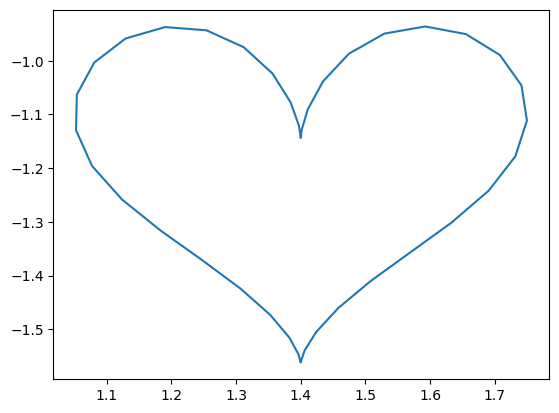

In [14]:
t = numpy.arange(0, 2*numpy.pi, 0.16)
x = 0.35 * numpy.sin(t)**3 + 1.4
y = 0.262 * numpy.cos(t) - 0.127 * numpy.cos(2*t) - 0.052 * numpy.cos(3*t) - 0.026 * numpy.cos(4*t) - 1.2

# Generates constant values for the z axis
z = numpy.full((len(x)), 0.02)

print('X')
print(numpy.array2string(x, precision=4, separator=',', suppress_small=True))
print('Y')
print(numpy.array2string(y, precision=4, separator=',', suppress_small=True))

print('Length of X: ', len(x))

plt.plot(x, y)
plt.show()

In [15]:
# def theta1(xc,yc):
# def theta2 (x_final, y_final, z_final, xc, yc):
# def theta3(x_final, y_final, z_final, xc, yc):
# def theta4(DH03):
# def theta5(DH03):
# def theta6(DH03=0):

motor0 = []
motor1 = []
motor2 = []
motor3 = []
motor4 = []
motor5 = []


for i in range(0, len(x)):
    motor0.append(theta1(x[i],y[i]))
    motor1.append(theta2(x[i], y[i], z[i], x[i], y[i]))
    motor2.append(theta3(x[i], y[i], z[i], x[i], y[i]))

    this_Dh03 = DH03(motor0[i], motor1[i], motor2[i], t4, t5)
    
    motor3.append(theta4(this_Dh03))
    motor4.append(theta5(this_Dh03))
    motor5.append(theta6())
    

print('motor0 = ', numpy.array2string(numpy.around(motor0, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor1 = ', numpy.array2string(numpy.around(motor1, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor2 = ', numpy.array2string(numpy.around(motor2, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor3 = ', numpy.array2string(numpy.around(motor3, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor4 = ', numpy.array2string(numpy.around(motor4, decimals=3), precision=4, separator=',', suppress_small=True))
print('motor5 = ', numpy.array2string(numpy.around(motor5, decimals=3), precision=4, separator=',', suppress_small=True))

motor0 =  [-0.685,-0.678,-0.658,-0.627,-0.59 ,-0.556,-0.531,-0.521,-0.525,-0.541,
 -0.566,-0.597,-0.634,-0.673,-0.713,-0.752,-0.786,-0.813,-0.831,-0.839,
 -0.84 ,-0.836,-0.831,-0.828,-0.828,-0.832,-0.838,-0.842,-0.837,-0.821,
 -0.79 ,-0.748,-0.704,-0.667,-0.645,-0.639,-0.647,-0.661,-0.676,-0.684]
motor1 =  [0.639,0.636,0.632,0.63 ,0.637,0.652,0.675,0.7  ,0.722,0.738,0.746,0.745,
 0.738,0.73 ,0.725,0.726,0.733,0.743,0.754,0.761,0.762,0.755,0.742,0.724,
 0.702,0.678,0.654,0.63 ,0.605,0.582,0.562,0.549,0.546,0.554,0.569,0.588,
 0.607,0.623,0.634,0.638]
motor2 =  [0.627,0.632,0.641,0.644,0.631,0.599,0.553,0.502,0.457,0.425,0.41 ,0.413,
 0.426,0.441,0.451,0.45 ,0.437,0.416,0.395,0.381,0.379,0.391,0.417,0.454,
 0.498,0.546,0.595,0.646,0.696,0.746,0.79 ,0.818,0.825,0.808,0.774,0.733,
 0.693,0.66 ,0.637,0.627]
motor3 =  [-0.526,-0.522,-0.508,-0.484,-0.453,-0.42 ,-0.394,-0.378,-0.373,-0.38 ,
 -0.396,-0.418,-0.447,-0.478,-0.509,-0.537,-0.559,-0.574,-0.581,-0.583,
 -0.584,-0.584,-0.587,-0.593,-0.

# 5 - Planejamento de trajetória

In [16]:
# Task time
tf = 0.448

# Columns = Initial position, speed and acceleration
# Rows = x, y and z
qi = [
    [1.580,0,0],
    [0,0,0],
    [1.765,0,0]
]

# Columns = Final position, speed and acceleration
# Rows = x, y and z
qf = [
    [1.400,0,0],
    [-1.143,0,0],
    [0.02,0,0]
]

print(qf[1][0])

-1.143


In [17]:
# Find initial position indexes

a_0 = [qi[0][0],qi[1][0],qi[2][0]]
a_1 = [qi[0][1],qi[1][1],qi[2][1]]
a_2 = [qi[0][2]/2,qi[1][2]/2,qi[2][2]/2]

In [18]:
# Define linear system for final position indexes
LS = [
    [ math.pow(tf,5) , math.pow(tf,4), math.pow(tf,3)],
    [ 5*math.pow(tf,4) , 4*math.pow(tf,3), 3*math.pow(tf,2) ],
    [ 20*math.pow(tf,3) , 12*math.pow(tf,2), 6*tf ]
]

SS = [0,0,0]

#print("Solution:\n")
#solutions = numpy.linalg.solve(LS, SS)
#print(solutions)

#a_5 = solutions[0]
#a_4 = solutions[1]
#a_3 = solutions[2]

for i in range(0,3):
  SS[i] = [
    [qf[i][0] - (a_0[i] + a_1[i]*tf + a_2[i]*math.pow(tf,2))],
    [qf[i][1] - (a_1[i] + 2*a_2[i]*tf)],
    [qf[i][2] - (2*a_2[i])]
  ]

solutions = [0,0,0]
print("Solution for X:\n")
solutions[0] = numpy.linalg.solve(LS,SS[0])
print(solutions[0])

print("Solution for Y:\n")
solutions[1] = numpy.linalg.solve(LS,SS[1])
print(solutions[1])

print("Solution for Z:\n")
solutions[2] = numpy.linalg.solve(LS,SS[2])
print(solutions[2])

a_5 = numpy.around([solutions[0][0][0], solutions[1][0][0], solutions[2][0][0]], decimals=3)
a_4 = numpy.around([solutions[0][1][0], solutions[1][1][0], solutions[2][1][0]], decimals=3)
a_3 = numpy.around([solutions[0][2][0], solutions[1][2][0], solutions[2][2][0]], decimals=3)

Solution for X:

[[-59.84580119]
 [ 67.02729733]
 [-20.01881947]]
Solution for Y:

[[-380.02083755]
 [ 425.62333806]
 [-127.11950363]]
Solution for Z:

[[-580.17179486]
 [ 649.79241024]
 [-194.07133319]]


In [19]:
# Show position function
#print("Position function:\n")
#print("q(t) = ", a_5, "t^5 + ", a_4, "t^4 + ", a_3, "t^3 + ", a_2, "t^2 + ", a_1, "t + ", a_0)

# Show speed function
#print("Speed function:\n")
#print("q'(t) = ", 5*a_5, "t^4 + ", 4*a_4, "t^3 + ", 3*a_3, "t^2 + ", 2*a_2, "t + ", a_1)

# Show acceleration function
#print("Acceleration function:\n")
#print("q''(t) = ", 20*a_5, "t^3 + ", 12*a_4, "t^2 + ", 6*a_3, "t + ", 2*a_2)

names = ['X', 'Y', 'Z']

for i in range(0,3):
  print("Equations for", names[i] ,": \n")

  print("Position function: \n")
  print("q(t) = ", numpy.around(a_5[i],decimals=3), "t^5 + ", numpy.around(a_4[i],decimals=3), "t^4 + ", numpy.around(a_3[i],decimals=3), "t^3 + ", numpy.around(a_2[i],decimals=3), "t^2 + ", numpy.around(a_1[i],decimals=3), "t + ", numpy.around(a_0[i],decimals=3))

  print("Speed function:\n")
  print("q'(t) = ", numpy.around(5*a_5[i],decimals=3), "t^4 + ", numpy.around(4*a_4[i],decimals=3), "t^3 + ", numpy.around(3*a_3[i],decimals=3), "t^2 + ", numpy.around(2*a_2[i],decimals=3), "t + ", numpy.around(a_1[i],decimals=3))

  print("Acceleration function:\n")
  print("q''(t) = ", numpy.around(20*a_5[i],decimals=3), "t^3 + ", numpy.around(12*a_4[i],decimals=3), "t^2 + ", numpy.around(6*a_3[i],decimals=3), "t + ", numpy.around(2*a_2[i],decimals=3))

  print('\n ================================================================================== \n')


Equations for X : 

Position function: 

q(t) =  -59.846 t^5 +  67.027 t^4 +  -20.019 t^3 +  0.0 t^2 +  0 t +  1.58
Speed function:

q'(t) =  -299.23 t^4 +  268.108 t^3 +  -60.057 t^2 +  0.0 t +  0
Acceleration function:

q''(t) =  -1196.92 t^3 +  804.324 t^2 +  -120.114 t +  0.0


Equations for Y : 

Position function: 

q(t) =  -380.021 t^5 +  425.623 t^4 +  -127.12 t^3 +  0.0 t^2 +  0 t +  0
Speed function:

q'(t) =  -1900.105 t^4 +  1702.492 t^3 +  -381.36 t^2 +  0.0 t +  0
Acceleration function:

q''(t) =  -7600.42 t^3 +  5107.476 t^2 +  -762.72 t +  0.0


Equations for Z : 

Position function: 

q(t) =  -580.172 t^5 +  649.792 t^4 +  -194.071 t^3 +  0.0 t^2 +  0 t +  1.765
Speed function:

q'(t) =  -2900.86 t^4 +  2599.168 t^3 +  -582.213 t^2 +  0.0 t +  0
Acceleration function:

q''(t) =  -11603.44 t^3 +  7797.504 t^2 +  -1164.426 t +  0.0


